In [ ]:
from torch.utils.data import DataLoader,Dataset
import torch
import torchvision.transforms as transforms
from torchvision import datasets
import torchvision.models as models
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
train_data = datasets.MNIST(root='./data',train=True,download=True,transform=torchvision.transforms.ToTensor())
test_data = datasets.MNIST(root='./data',train=False,download=True,transform=torchvision.transforms.ToTensor())
train_loader = DataLoader(train_data,batch_size=64,shuffle=True)
test_loader = DataLoader(test_data,batch_size=64,shuffle=True)

In [ ]:
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        self.maxpool = torch.nn.MaxPool2d(2,2)
        self.conv1 = torch.nn.Conv2d(1,16,2,padding=1)
        self.conv2 = torch.nn.Conv2d(16,8,2,padding=1)
        self.tconv1 = torch.nn.ConvTranspose2d(8,16,4,stride=2,padding=1)
        self.tconv2 = torch.nn.ConvTranspose2d(16,1,1,stride=1,padding=1)


    def forward(self,x):
        x = self.encode(x)
        x = self.decode(x)
        return x
    def encode(self,x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        return x
    def decode(self,x):
        x = self.tconv1(x)
        x = self.relu(x)
        x = self.tconv2(x)
        x = self.sigmoid(x)
        return x

In [ ]:
model = Autoencoder().to(device)
epochs = 10
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.MSELoss()
running_loss = 0

In [ ]:
for epoch in range(epochs):
    running_loss = 0
    for data in tqdm(train_loader):
        img,label = data
        img = img.to(device)
        output = model(img)
        loss = criterion(output,img)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print(f'epoch: {epoch}, loss: {running_loss}')

100%|██████████| 938/938 [00:08<00:00, 104.58it/s]


epoch: 0, loss: 21.021349078742787


100%|██████████| 938/938 [00:09<00:00, 101.63it/s]


epoch: 1, loss: 1.4236517088720575


100%|██████████| 938/938 [00:12<00:00, 75.20it/s] 


epoch: 2, loss: 1.0637703678221442


100%|██████████| 938/938 [00:09<00:00, 101.13it/s]


epoch: 3, loss: 0.89903840579791


100%|██████████| 938/938 [00:09<00:00, 100.19it/s]


epoch: 4, loss: 0.7781607505166903


100%|██████████| 938/938 [00:08<00:00, 110.61it/s]


epoch: 5, loss: 0.7113410125602968


100%|██████████| 938/938 [00:09<00:00, 102.16it/s]


epoch: 6, loss: 0.659316350822337


100%|██████████| 938/938 [00:09<00:00, 101.74it/s]


epoch: 7, loss: 0.6143598763737828


100%|██████████| 938/938 [00:08<00:00, 107.24it/s]


epoch: 8, loss: 0.5844341737683862


100%|██████████| 938/938 [00:09<00:00, 97.73it/s] 

epoch: 9, loss: 0.563827995036263


(64, 1, 28, 28)


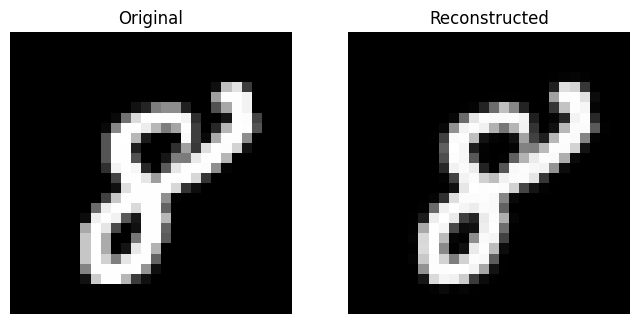

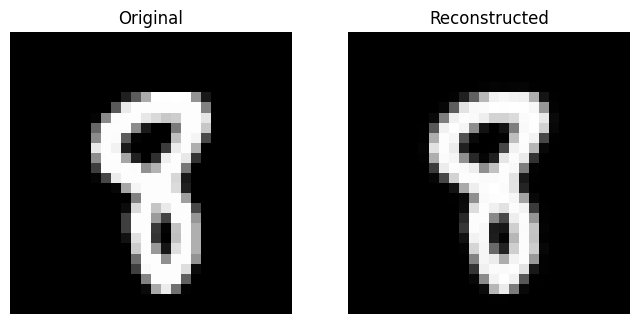

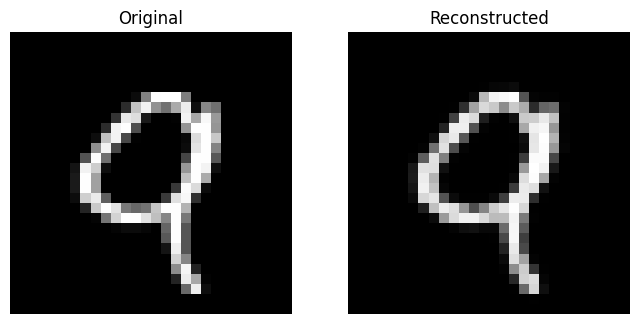

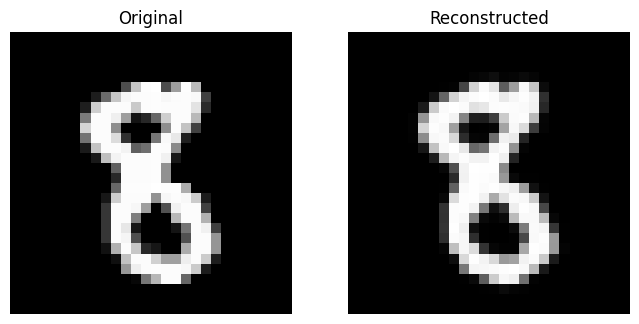

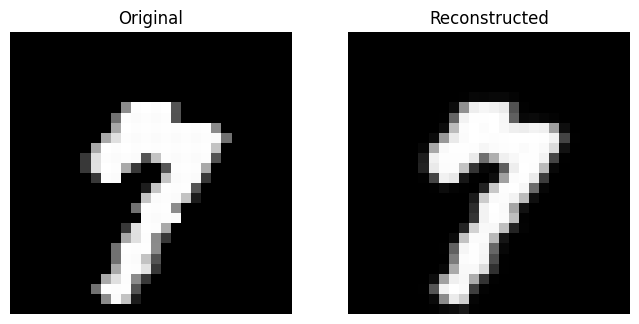

In [ ]:
data_iter = iter(train_loader)
images,labels = next(data_iter)

with torch.no_grad():
    output = model(images.to(device))
    output = output.cpu()
    output = output.numpy()
    print(output.shape)
    output = np.reshape(output,(64,28,28))



for j in range(5):
    image = images[j].numpy()
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(image[0], cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')
    axes[1].imshow(output[j], cmap='gray')
    axes[1].set_title('Reconstructed')
    axes[1].axis('off')
    plt.show()